# Plant Disease Prediction

## Dataset

Dataset Link: https://www.kaggle.com/datasets/rizwan123456789/potato-disease-leaf-datasetpld

## Importing libraries

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [21]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3251 files belonging to 3 classes.


### Validation Image Preprocessing

In [22]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 416 files belonging to 3 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [23]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [30]:
cnn.add(tf.keras.layers.Flatten())

In [31]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [32]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [33]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

### Compiling and Training Phase

In [34]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [36]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=40)

Epoch 1/40
102/102 [==============================] - 179s 2s/step - loss: 1.0428 - accuracy: 0.5020 - val_loss: 0.7937 - val_accuracy: 0.6587
Epoch 2/40
102/102 [==============================] - 152s 1s/step - loss: 0.7435 - accuracy: 0.6949 - val_loss: 0.6275 - val_accuracy: 0.7091
Epoch 3/40
102/102 [==============================] - 151s 1s/step - loss: 0.5009 - accuracy: 0.8130 - val_loss: 0.3877 - val_accuracy: 0.8365
Epoch 4/40
102/102 [==============================] - 150s 1s/step - loss: 0.3838 - accuracy: 0.8542 - val_loss: 0.2694 - val_accuracy: 0.9062
Epoch 5/40
102/102 [==============================] - 151s 1s/step - loss: 0.2894 - accuracy: 0.8890 - val_loss: 0.2370 - val_accuracy: 0.9159
Epoch 6/40
102/102 [==============================] - 153s 2s/step - loss: 0.2421 - accuracy: 0.9216 - val_loss: 0.2645 - val_accuracy: 0.8870
Epoch 7/40
102/102 [==============================] - 151s 1s/step - loss: 0.2040 - accuracy: 0.9271 - val_loss: 0.2008 - val_accuracy: 0.9351

## Evaluating Model

In [37]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

102/102 [==============================] - 33s 321ms/step - loss: 8.3484e-06 - accuracy: 1.0000
Training accuracy: 1.0


In [38]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

13/13 [==============================] - 4s 305ms/step - loss: 0.2507 - accuracy: 0.9591
Validation accuracy: 0.9591346383094788


### Saving Model

In [39]:
cnn.save('model.keras')

In [40]:
training_history.history #Return Dictionary of history

{'loss': [1.0428194999694824,
  0.7435202598571777,
  0.5008904337882996,
  0.38377755880355835,
  0.2894076406955719,
  0.24207262694835663,
  0.204027459025383,
  0.14921879768371582,
  0.11898382008075714,
  0.10404360294342041,
  0.10760096460580826,
  0.09269348531961441,
  0.06866295635700226,
  0.0651177391409874,
  0.03997866064310074,
  0.04360073432326317,
  0.05029179900884628,
  0.0911383107304573,
  0.0440807081758976,
  0.03374915570020676,
  0.03051004745066166,
  0.034087181091308594,
  0.02975783497095108,
  0.019534749910235405,
  0.009975524619221687,
  0.06582895666360855,
  0.03326743468642235,
  0.021025849506258965,
  0.03452836722135544,
  0.006395997013896704,
  0.0019536151085048914,
  0.000291615491732955,
  0.00011810980504378676,
  6.549408135470003e-05,
  7.883548823883757e-05,
  5.0678128900472075e-05,
  3.7483951018657535e-05,
  4.2229879909427837e-05,
  4.529069337877445e-05,
  2.8230973839526996e-05],
 'accuracy': [0.5019993782043457,
  0.6948631405830

In [41]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [42]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

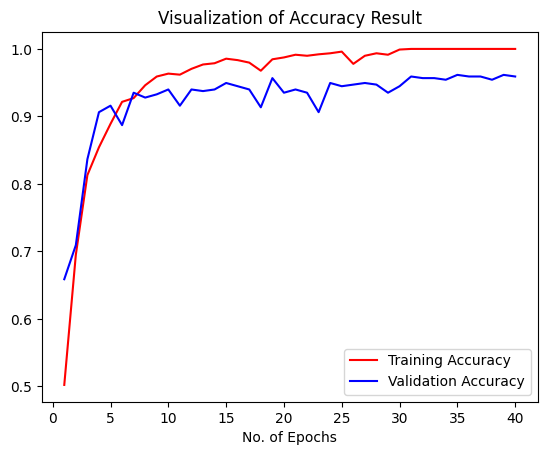

In [43]:
epochs = [i for i in range(1,41)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [44]:
cnn.save('model.h5')